In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("results/survey.csv")
df = df.sort_values("gamma")
df_cond_weights = df[(df.method == "ru_regression") & (df.loss == "poisson_nll") & (df.use_train_weights==True)]
df_cond = df[(df.method == "ru_regression") & (df.loss == "poisson_nll") & (df.use_train_weights==False)]
df_joint = df[(df.method == "joint_ru_regression") & (df.loss == "poisson_nll")]

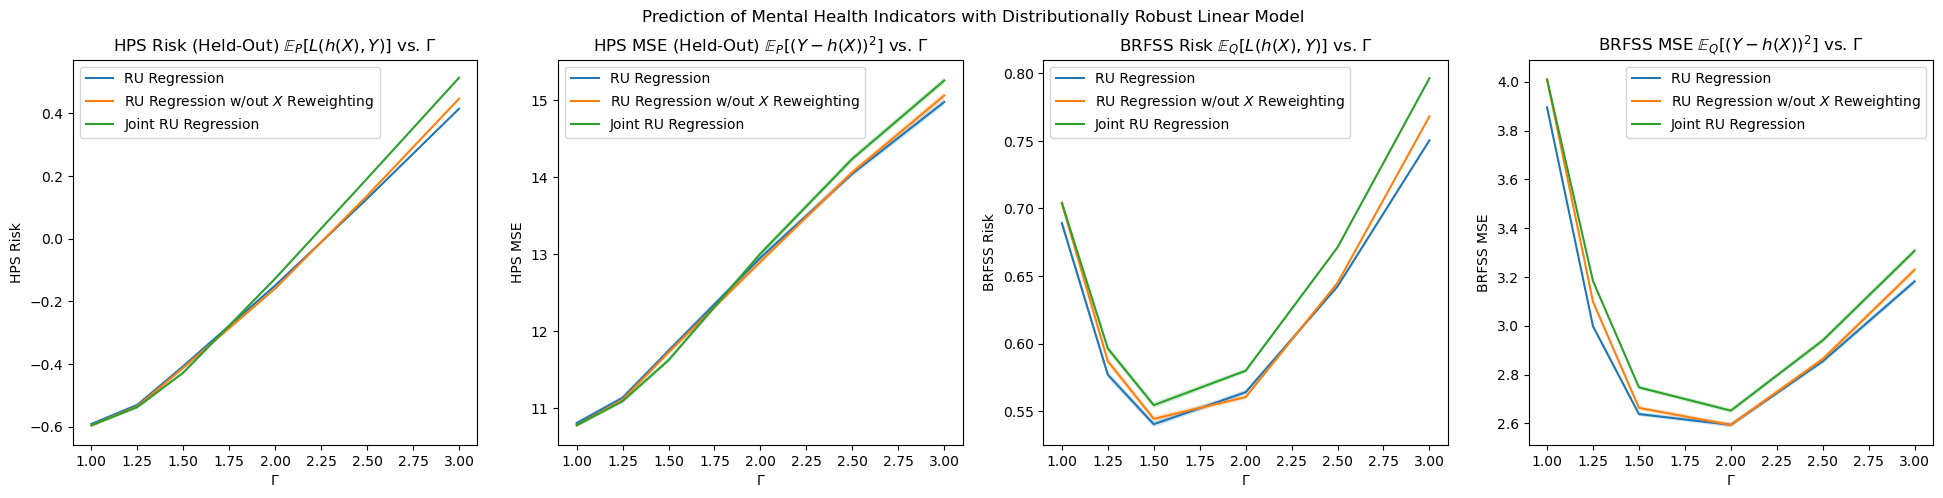

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(24, 5))

labels = ["hps_loss", "hps_mse", "test_loss", "test_mse"]
for i in range(4):
    ax[i].plot(df_cond_weights["gamma"], df_cond_weights[labels[i]], label="RU Regression")
    ax[i].fill_between(df_cond_weights["gamma"], df_cond_weights[labels[i]]- df_cond_weights[labels[i] + "_se"], 
                       df_cond_weights[labels[i]] + df_cond_weights[labels[i] + "_se"], alpha=0.2)
    
    ax[i].plot(df_cond["gamma"], df_cond[labels[i]], label="RU Regression w/out " + r"$X$" + " Reweighting")
    ax[i].plot(df_joint["gamma"], df_joint[labels[i]], label="Joint RU Regression")
    ax[i].fill_between(df_cond["gamma"], df_cond[labels[i]]- df_cond[labels[i] + "_se"], 
                       df_cond[labels[i]] + df_cond[labels[i] + "_se"], alpha=0.2)
    ax[i].fill_between(df_joint["gamma"], df_joint[labels[i]]- df_joint[labels[i] + "_se"], 
                       df_joint[labels[i]] + df_joint[labels[i] + "_se"], alpha=0.2)
    

    
ax[0].set_ylabel("HPS Risk")
ax[0].set_title("HPS Risk (Held-Out) "+r"$\mathbb{E}_{P}[L(h(X), Y)]$" + " vs. $\Gamma$")

ax[1].set_ylabel("HPS MSE")
ax[1].set_title("HPS MSE (Held-Out) "+r"$\mathbb{E}_{P}[(Y - h(X))^{2}]$" + " vs. $\Gamma$")

ax[2].set_ylabel("BRFSS Risk" )
ax[2].set_title("BRFSS Risk " + r"$\mathbb{E}_{Q}[L(h(X), Y)]$" + " vs. $\Gamma$" )

ax[3].set_ylabel("BRFSS MSE" )
ax[3].set_title("BRFSS MSE " + r"$\mathbb{E}_{Q}[(Y - h(X))^{2}]$" + " vs. $\Gamma$" )

for i in range(len(ax)):
    ax[i].legend()
    ax[i].set_xlabel("$\Gamma$")

plt.suptitle("Prediction of Mental Health Indicators with Distributionally Robust Linear Model")
plt.savefig("figs/survey_res.pdf", bbox_inches="tight")